In [1]:
import numpy as np
import scipy.stats as stats
import scipy.special as special

### Binomial Distribution

Take the example of the flipping of a coin. Let us label the outcome as $\gamma$ which can take two values $0$ or $1$. We then define a parameter $\theta$ which will give us the probability of the outcome being $\gamma$. This is written as:

\begin{equation}
P\left(\gamma|\theta\right) = \theta^{\gamma}\left(1-\theta\right)^{1-\gamma}
\end{equation}

The above distribution is known as the Binomial distribution or the Bernoulli distribution. This particular distribution can also be inferred in a different manner. We can consider that $\gamma$ to be fixed by an observation and the parameter $\theta$ to be a variable. The above equation then gives the probability of getting $\gamma$ output for different values of $\theta$. In this scenario, this function is called the likelihood function of the parameter $\theta$

In Bayesian inference, $P\left(\gamma|\theta\right)$ is usually thought of with the data $\gamma$ being fixed and certain and the parameter $\theta$ to be a variable and uncertain. In this particular case, this is known as the Bernoulli likelihood function of $\theta$. 

#### Fixed set of outcomes

Consider the case of multiple flips. Each flip can be considered independent of each other. The joint probability would be thus a product of all individual probabilities.

\begin{align}
P\left(\{\gamma_i\} |\theta\right) &=& \Pi_i p\left(\gamma_i|\theta\right)\\
                                   &=& \theta^{\Sigma_i \gamma_i}\left(1-\theta\right)^{\Sigma_i\left(1-\gamma_i\right)}\\
                                   &=& \theta^{z}\left(1-\theta\right)^{N-z}
\end{align}

where $N$ is the total number of tosses and $z = \Sigma_i\gamma_i$ is the number of heads

### Conjugate Priors

The Baye's rule is given by :

\begin{equation}
P\left(\gamma|\theta\right) = \frac{P\left(\theta|\gamma\right)P\left(\theta\right)}{\int d\theta' P\left(\theta'|\gamma\right)P\left(\theta'\right)}
\end{equation}

Bayesian statistics involve the idea of a prior and a posterior distribution of probabilities. In the Bayes's rule given above, $P\left(\theta\right)$ is the prior probability and the posterior probability upon the outcome of an experiment or an observation is given by the term on the left hand side $P\left(\gamma|\theta\right)$. 

Ideally we can assume any form of function for the prior distribution as long as the outcome lies in the range $[0, 1]$. However it would be mathematically far more simpler if on multiplication by the likelihood function, the posterior distribution has the same functional form as the prior. This would indeed make future posterior probaility functions very easy to caluculate. It would also be helpful if the denominator $\int d\theta' P\left(\theta'|\gamma\right)P\left(\theta'\right)$ be analytically solvable. In the particular scenarios where the prior and posterior distributions has the same functional form, the posterior is said to be conjugate of the prior.

##### Note: A conjugate prior is related to the likelihood function under consideration. If you change the likelihood function will probably need a different conjugate prior.

### Conjugate function for a Bernoulli likelihood function

The outcome of a single coin toss or a multiple coin toss can be decsribed by the Bernoulli function as depicted in the previous function. Bernoulli function has the form $\theta^{\gamma}\left(1-\theta\right)^{1-\gamma}$. An appropriate prior function should look like $\theta^\left(a-1\right)\left(1-\theta\right)^\left(b-1\right)$ which when multiplied by the Bernoulli likelihood will have the same functional form. 

The Beta distribution function given by 
\begin{equation}
\beta\left(\theta, a, b\right) = \frac{\theta^\left(a-1\right)\left(1-\theta\right)^\left(b-1\right)}{B\left(a, b\right)}
\end{equation}

will be a possible conjugate prior to the Bernoulli likelihood function, here $B\left(a, b\right)$ is a normalizing factor so that the area under the integration goes to 1. In effect we will have the prior probaility as $P\left(\theta\right) = \beta\left(\theta, a, b\right)$

Also the normalizer $B\left(\theta\right)$ is given by:
\begin{equation}
B\left(a, b\right) = \int d\theta\text{ } \theta^a\left(1-\theta\right)^b
\end{equation}

which is the beta function.

#### Choosing a prior
The choice of a prior depends on the information available to us. For example, if we do not know anything about the coin that is about to be tossed, then probable we will assume that it is equally likely to have all values of the parameter $\theta$. That would correspond to $P\left(\theta\right) = \frac{\theta^a\left(1-\theta\right)^b}{\beta\left(a, b\right)}$ with $a=1, b=1$

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from scipy.stats import beta

In [4]:
a, b = 1, 1
x = np.linspace(0, 1, 100)


Text(0,0.5,'$P\\left(\\theta\\right)$')

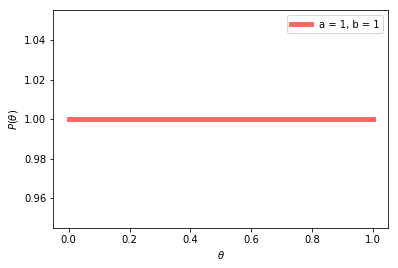

In [5]:
fig, ax = plt.subplots(1, 1)
ax.plot(x, beta.pdf(x, a, b)/special.beta(a,b),'r-', lw=5, alpha=0.6, label='a = {}, b = {}'.format(a,b))
ax.legend(loc = 'best')
ax.set_xlabel(r'$\theta$')
ax.set_ylabel(r'$P\left(\theta\right)$')

Let us look at the various shapes of priors we can choose from depending upn the previous information that might be provided to us:


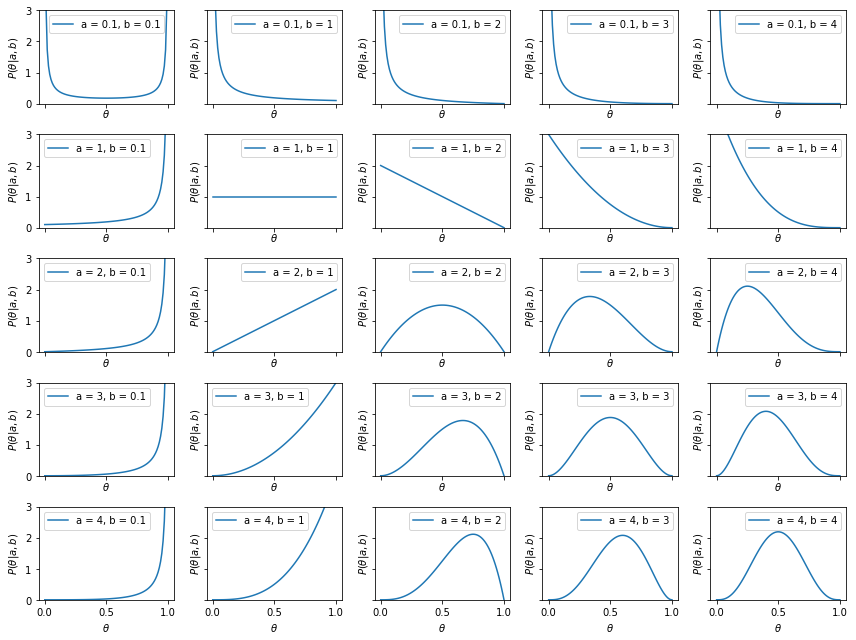

In [6]:
a,  b = [[0.1,1,2,3,4], [0.1,1,2,3,4]]
fig1, ax1 = plt.subplots(len(a), len(b), sharex = 'all', sharey = 'all', figsize = (12, 9))
for i in range(len(a)):
    for j in range(len(b)):
        ax1[i, j].plot(x, beta.pdf(x, a[i], b[j]),  label='a = {}, b = {}'.format(a[i],b[j]))
        ax1[i, j].legend(loc = 'best')
        ax1[i, j].set_xlabel(r'$\theta$')
        ax1[i, j].set_ylabel(r'$P\left(\theta|a,b\right)$')
        ax1[i, j].set_ylim(0,3)
fig1.tight_layout()
        

The above plots shows the various shape of the prior distribution functions (not normalized) that might be available to us depending on our experience and available information. In the figures shown above the total no. of tosses are $n = a + b$. We can see that for $a=4, b=4$ the distrinution is narrow around $\theta = 0.5$ compared to the case of $a=2, b = 2$. This means that with more information we can choose a prior that has more confidence. 

### Some more properties of the beta distribution function

The choice of a prior is quite often dependent on the information that we have acquired and our own biases. For e.g. if we know that a coin has been minted in a government facility, then we would reasonably assume that the parameter $\theta $ is centred around $0.5$. Depending upon our confidence in the government minting facilty we could assume prior to performing any experiment that if we had performed 200 experiments then half of it would have turned up heads and the other half tails. That would correspond to a very narrow distribution of the probability $P\left(\theta|a,b\right)$ centered around $\theta = 0.5$. Thus it would be useful to know the central tendencies of this distribution (or as matter of fact any prior distribution one might assume.)

The mean of the distribution function $B\left(\theta|a, b\right)$ is :
\begin{equation}
\mu = \frac{a}{a+b}
\end{equation}
The mode is given by :

\begin{equation}
\omega = \frac{a-1}{a+b-2}
\end{equation}
for $a>1$ and $b>1$. As expected from the plots of the distribution function when $a=b$, both the mean and the mode are the same and equal to $0.5$.

Another important parameter is the spread of the beta function. This is denoted by $\kappa = a+b$. The higher the value of $\kappa$, narrower the spread of the distribution around the mean. 

The following equations are useful to know the relation ships between the parameters and the choice of $a, b$.
\begin{align}
a & = & \mu\kappa\\
b & = & \left(1-\mu\right)\kappa\\
a & = & \omega\left(\kappa - 2\right)+1\\
b & = & \left(1 - \omega \right)\left(\kappa - 2\right)+1
\end{align}

In terms of standard deviation, $\sigma$ the parameters $a, b$ can be written as:

\begin{align}
a &=& \mu\left( \frac{\mu\left(1-\mu\right)}{\sigma^2} -1\right)\\
b &=& \left(1-\mu\right)\left( \frac{\mu\left(1-\mu\right)}{\sigma^2} -1\right)
\end{align}

### Choice of prior or how to choose $\kappa$

Suppose I borrow coins from a friend. I have the previous information from someone else that he is susceptible to give you biased coins with $\theta = 0.8$.  However you are not sure how much this information is reliable. You this want a few tosses to sway the distribution towards a correct one. This can be achieved by assuming a smaller value of $\kappa$. Choosing a very large value would $\kappa$ is advisable only if your source of information is really reliable. Otherwise it will take a large number of tosses to sway the model towards the correct distribution.

In order to see how distribution varies with $\kappa$ let us redefine a the beta function in terms of $\kappa, \mu, \omega \text{ and } \sigma$. 

In [7]:
def betaABfromMeanKappa(x, mean, kappa):
    a = mean*kappa
    b = (1-mean)*kappa
    return beta.pdf(x, a, b)
def betaABfromModeKappa(x, mode, kappa):
    a = mode*(kappa-2)+1
    b = (1-mode)*(kappa-2)+1
    return beta.pdf(x, a, b)
def betaABfromSDMean(x, sd, mean):
    a = mean*(mean*(1-mean)/sd**2-1)
    b = (1-mean)*(mean*(1-mean)/sd**2-1)
    return beta.pdf(x, a, b)

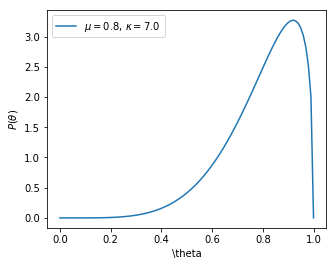

In [8]:
mean, kappa = 0.8, 7.0
fig, ax = plt.subplots(1,1, figsize = (5,4))
ax.plot(x, betaABfromMeanKappa(x, mean, kappa), label = r'$\mu=${}, $\kappa=${}'.format(mean, kappa))
ax.set_xlabel(r'\theta')
ax.set_ylabel(r'$P\left(\theta\right)$')
ax.legend(loc = 'best')

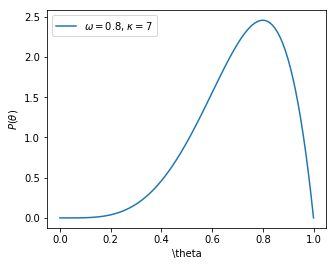

In [9]:
mode, kappa = 0.8, 7
fig, ax = plt.subplots(1,1, figsize = (5,4))
ax.plot(x, betaABfromModeKappa(x, mode, kappa), label = r'$\omega=${}, $\kappa=${}'.format(mode, kappa))
ax.set_xlabel(r'\theta')
ax.set_ylabel(r'$P\left(\theta\right)$')
ax.legend(loc = 'best')

### The Posterior beta distribution

The posterior distribution is obtained by applying the Bayes' rule to the prior distribution. Suppose we performed an experiment, consisting of $N$ coin flips out of which $z$ where heads. The likelihood function is thus given by:
\begin{equation}
P\left(z, N|\theta\right) = \theta^z\left(1-\theta\right)^\left(N-z\right)
\end{equation}
Let us assume a beta distribution prior given by:

\begin{equation}
P\left(\theta|a, b\right) = \frac{\theta^\left(a-1\right)\left(1-\theta\right)^\left(b-1\right)}{\beta\left(a, b\right)}
\end{equation}

Now let's start from the Bayes' rule:
\begin{align}
P\left(\theta|z,N\right) &=& \frac{P\left(z, N|\theta\right) P\left(\theta\right)}{P\left(z, N\right)}\\
                         &=& \frac{P\left(z, N|\theta\right) P\left(\theta\right)}{\int_{\theta '}d\theta 'P\left(z, N|\theta ' \right)P\left(\theta '\right)}\\
                         &=& \frac{\theta^{\left(z+a\right)-1}\left(1-\theta\right)^{\left(N-z+b\right)-1}}{\beta\left(z+a, N-z+b\right)}
\end{align}

The posterior distribution as we can see is also a beta distribution function. However we have new value for the parameters of the beta distribution function $a'= a+z, b'= N-z+b$, which changes the overall model. 

### The significance of the posterior

Let us consider a prior such with $a=5$ and $b=5$. Now suppose we do $N = 1$ flips out of which the number of heads $z=1$. Let us look at the prior probability, likelihood function and the posterior probability. The prior is given by the function:

\begin{equation}
P\left(\theta|5, 5\right) = \frac{\theta^\left(5-1\right)\left(1-\theta\right)^\left(5-1\right)}{\beta\left(5, 5\right)}
\end{equation}


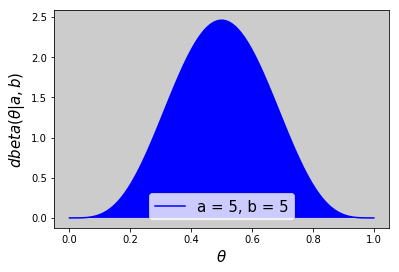

In [10]:
#prior
a,b = 5, 5
fig, ax = plt.subplots(1, 1)
ax.plot(x, beta.pdf(x, a, b), 'b-',  label='a = {}, b = {}'.format(a,b))
ax.legend(loc = 'best', fontsize = 15)
ax.set_xlabel(r'$\theta$', fontsize = 15)
ax.set_ylabel(r'$dbeta\left(\theta|a,b\right)$', fontsize = 15)
ax.fill(x, beta.pdf(x, a, b), 'b')
ax.set_facecolor('0.8')


### Likelihood function
Now for the likelihood function let us assume that we performed and experiment where we had $N = 10$ flips and got only $z = 1$ heads. Thus we will have a Bernoulli likelihood given by:
\begin{equation}
P\left(D|\theta\right) = \theta\left(1-\theta\right)^9
\end{equation}

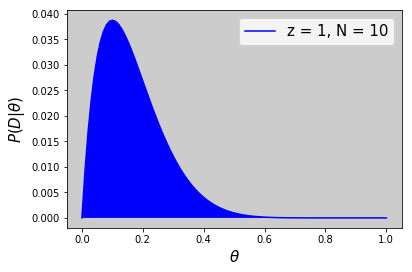

In [11]:
def likelihood(theta, N, z):
    return ((theta)**z)*(1-theta)**(N-z)
fig, ax = plt.subplots(1, 1)
ax.plot(x, likelihood(x, 10, 1), 'b-', label = 'z = 1, N = 10')
ax.legend(loc = 'best', fontsize = 15)
ax.set_xlabel(r'$\theta$', fontsize = 15)
ax.set_ylabel(r'$P\left(D|\theta\right)$', fontsize = 15)
ax.fill(x, likelihood(x, 10, 1), 'b')
ax.set_facecolor('0.8')

### The posterior distribution
The posterior distribution can now be obtained from the function:
\begin{align}
P\left(\theta|z,N\right) &=& \frac{P\left(z, N|\theta\right) P\left(\theta\right)}{P\left(z, N\right)}\\
                         &=& \frac{P\left(z, N|\theta\right) P\left(\theta\right)}{\int_{\theta '}d\theta 'P\left(z, N|\theta ' \right)P\left(\theta '\right)}\\
                         &=& \frac{\theta^{\left(z+a\right)-1}\left(1-\theta\right)^{\left(N-z+b\right)-1}}{\beta\left(z+a, N-z+b\right)}
\end{align}

Replacing $a=5, b=5$ and $z=1, N=10$ we will have :
\begin{equation}
P\left(\theta|z=1,N=10\right) = \frac{\theta^{\left(6-1\right)}\left(1-\theta\right)^{14-1}}{\beta\left(6,14\right)}
\end{equation}


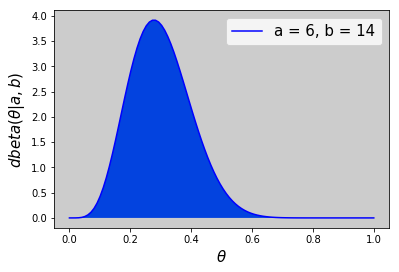

In [18]:
a,b = 6, 14
fig, ax = plt.subplots(1, 1)
ax.plot(x, beta.pdf(x, a, b), 'b-',  label='a = {}, b = {}'.format(a,b))
ax.legend(loc = 'best', fontsize = 15)
ax.set_xlabel(r'$\theta$', fontsize = 15)
ax.set_ylabel(r'$dbeta\left(\theta|a,b\right)$', fontsize = 15)
ax.fill(x, beta.pdf(x, a, b), 'xkcd:blue')
ax.set_facecolor('0.8')


### Prior knowledge that cannot be expressed as a beta distribution

Suppose a company specializes in manufacturing coins of two types - one that has a probability of heads being 25% and the other having probability of head being 75 %. Or prior model thus has a distribution that is bimodal with peaks around 0.25 and 0.75. We can construct to be composed of two Gaussians with peaks at 0.25 and 0.75 respectively.

In [60]:
# Creating the prior
def prior(x):
    return  (np.exp(-(x - 0.25)**2/.002)/np.sqrt(2*np.pi*.001) + np.exp(-(x - 0.75)**2/.002)/np.sqrt(2*np.pi*.001))/2

In [61]:
x =  np.linspace(0, 1, 1000)

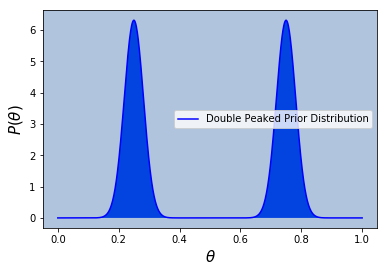

In [62]:
fig, ax = plt.subplots(1, 1)
ax.plot(x, prior(x), 'b-',  label='Double Peaked Prior Distribution')
ax.legend(loc = 'best', fontsize = 10)
ax.set_xlabel(r'$\theta$', fontsize = 15)
ax.set_ylabel(r'$P\left(\theta\right)$', fontsize = 15)
ax.fill(x, prior(x), 'xkcd:blue')
ax.set_facecolor('lightsteelblue')

Let us check whether our distrbution integrates to unity or not when intergrated all over the theta space as it should.

In [63]:
from scipy.integrate import simps
simps(prior(x),x)

0.9999999999999987

Which is close to unity so this prior distribution is valid. Now suppose we flip coins 27 times and we get 14 heads and 13 tails. The likelihood function is thus given by:

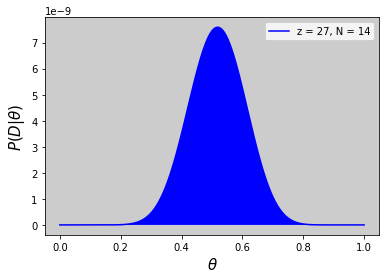

In [69]:
fig, ax = plt.subplots(1, 1)
ax.plot(x, likelihood(x, 27, 14), 'b-', label = 'z = {}, N = {}'.format(27, 14) )
ax.legend(loc = 'best', fontsize = 10)
ax.set_xlabel(r'$\theta$', fontsize = 15)
ax.set_ylabel(r'$P\left(D|\theta\right)$', fontsize = 15)
ax.fill(x, likelihood(x, 27, 14), 'b')
ax.set_facecolor('0.8')

Now we will calculate the posterior distribution:

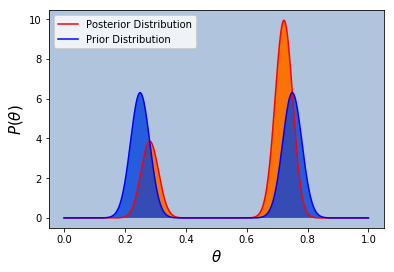

In [86]:
fig, ax = plt.subplots(1, 1)
ax.plot(x, prior(x)*likelihood(x, 27, 14)/simps(prior(x)*likelihood(x, 27, 14),x), 'r-',  label='Posterior Distribution')
ax.plot(x, prior(x), 'b-',  label='Prior Distribution')
ax.legend(loc = 'best', fontsize = 10)
ax.set_xlabel(r'$\theta$', fontsize = 15)
ax.set_ylabel(r'$P\left(\theta\right)$', fontsize = 15)
ax.fill(x, prior(x)*likelihood(x, 27, 14)/simps(prior(x)*likelihood(x, 27, 14),x), 'xkcd:orange' )
ax.fill(x, prior(x), 'xkcd:blue', alpha = 0.8)
ax.set_facecolor('lightsteelblue')

As can be seen the posterior distribution has been shifted inwards when compared to the prior distribution. This makes sense as the experiment performed has nearly equal number of heads and tails which comes up, making the central tendency of the theta distribution move towards a central peak at $theta = 0.5$. However that would need a really large number of experiments as we have a relatively strong prior. We can do that above calulcation using a relatively weak prior and see what happens

In [89]:
# Creating the prior
def prior_weak(x):
    return  (np.exp(-(x - 0.25)**2/.02)/np.sqrt(2*np.pi*.01) + np.exp(-(x - 0.75)**2/.02)/np.sqrt(2*np.pi*.01))/2

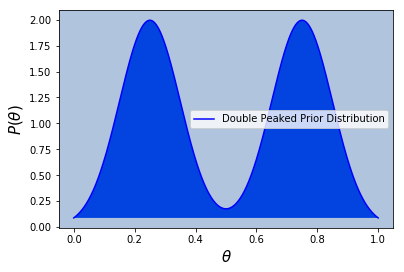

In [91]:
fig, ax = plt.subplots(1, 1)
ax.plot(x, prior_weak(x), 'b-',  label='Double Peaked Prior Distribution')
ax.legend(loc = 'best', fontsize = 10)
ax.set_xlabel(r'$\theta$', fontsize = 15)
ax.set_ylabel(r'$P\left(\theta\right)$', fontsize = 15)
ax.fill(x, prior_weak(x), 'xkcd:blue')
ax.set_facecolor('lightsteelblue')

Let's us calculate the posterior:

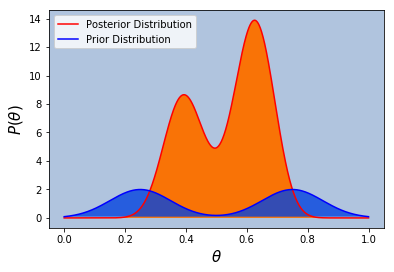

In [93]:
fig, ax = plt.subplots(1, 1)
ax.plot(x, prior_weak(x)*likelihood(x, 27, 14)/simps(prior(x)*likelihood(x, 27, 14),x), 'r-',  label='Posterior Distribution')
ax.plot(x, prior_weak(x), 'b-',  label='Prior Distribution')
ax.legend(loc = 'best', fontsize = 10)
ax.set_xlabel(r'$\theta$', fontsize = 15)
ax.set_ylabel(r'$P\left(\theta\right)$', fontsize = 15)
ax.fill(x, prior_weak(x)*likelihood(x, 27, 14)/simps(prior(x)*likelihood(x, 27, 14),x), 'xkcd:orange' )
ax.fill(x, prior_weak(x), 'xkcd:blue', alpha = 0.8)
ax.set_facecolor('lightsteelblue')